In [28]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start = '2020-01-01'
end = "2024-10-10"


In [6]:
df = pd.read_csv("findata.csv")
df.head(5)

,Date,YNDX,MSFT,AAPL,NVDA,MA
0,2020-01-02,44.080002,153.938202,72.876099,5.973122,295.023926
1,2020-01-03,43.209999,152.021408,72.167603,5.877516,292.145538
2,2020-01-06,43.099998,152.414352,72.742661,5.902164,292.923401
3,2020-01-07,43.165001,151.024689,72.400543,5.973620,291.931519
4,2020-01-08,43.770000,153.430252,73.565201,5.984824,297.082611


In [7]:
df = df[["MSFT"]].copy()
df.describe()

,MSFT
count,1201.000000
mean,283.148123
std,78.244620
min,130.141022
25%,226.949829
50%,273.176849
75%,328.692810
max,466.718781


In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.MSFT.dropna())
print(f"ADF test statistics = {result[0]}")
print(f"p-value = {result[1]}")

for key, value in result[4].items():
    print(f'   {key}, {value}') 

ADF test statistics = -0.9408071269040211
p-value = 0.7742372863129521
Critial Values:
   1%, -3.4358524769414425
Critial Values:
   5%, -2.86396979279864
Critial Values:
   10%, -2.5680636679447946


In [10]:
from statsmodels.graphics.tsaplots import plot_acf

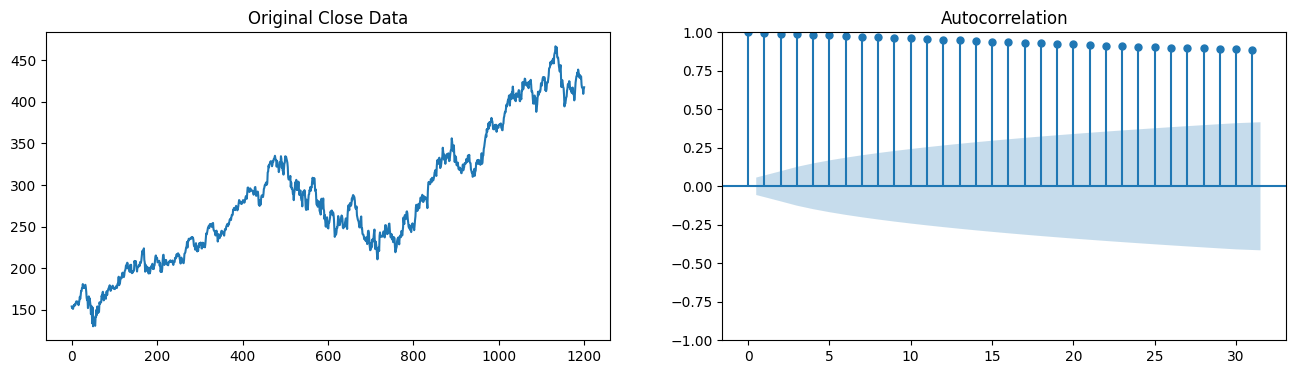

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.MSFT)

plot_acf(df.MSFT, ax=ax2);

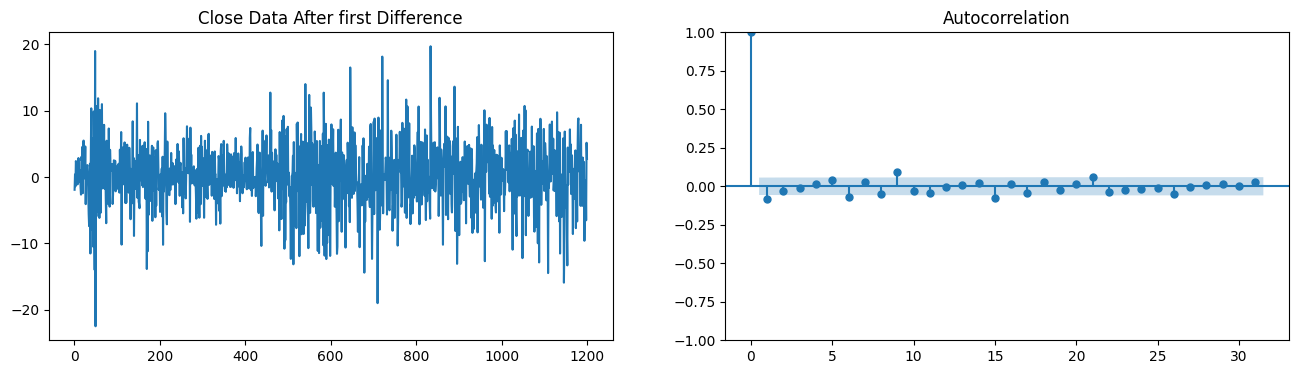

In [14]:
diff = df.MSFT.diff().dropna()

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)

plot_acf(diff, ax=ax2);

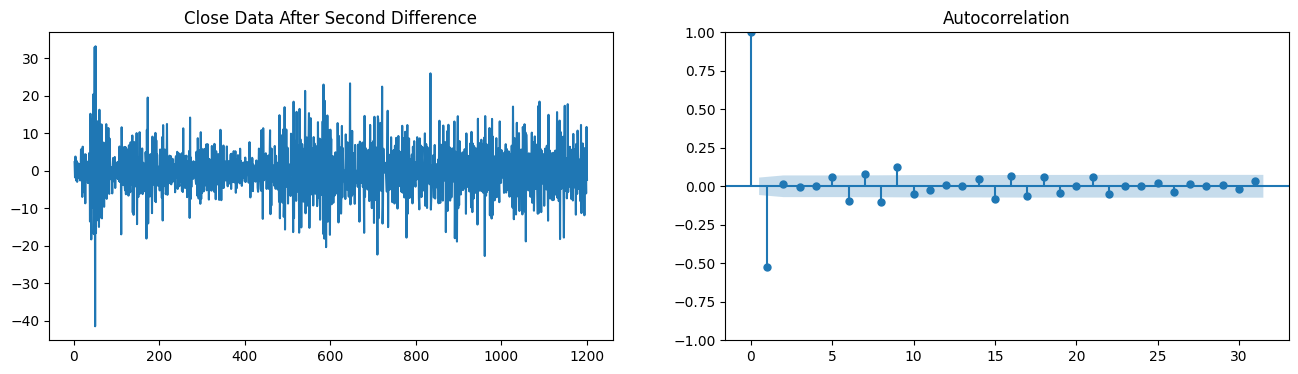

In [15]:
diff = df.MSFT.diff().diff().dropna()

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)

plot_acf(diff, ax=ax2);

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

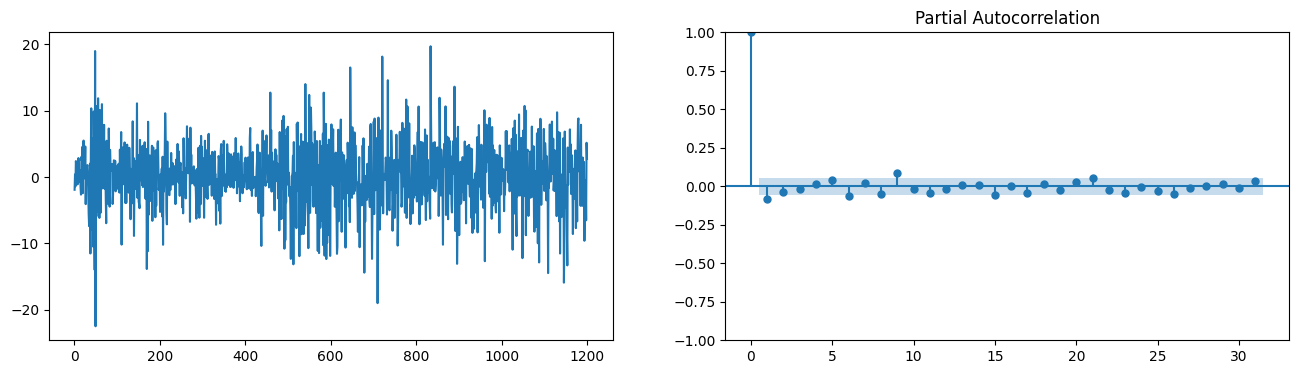

In [17]:
diff = df.MSFT.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)


ax2.set_ylim(0, 1)

plot_pacf(diff, ax=ax2);

Finding Q

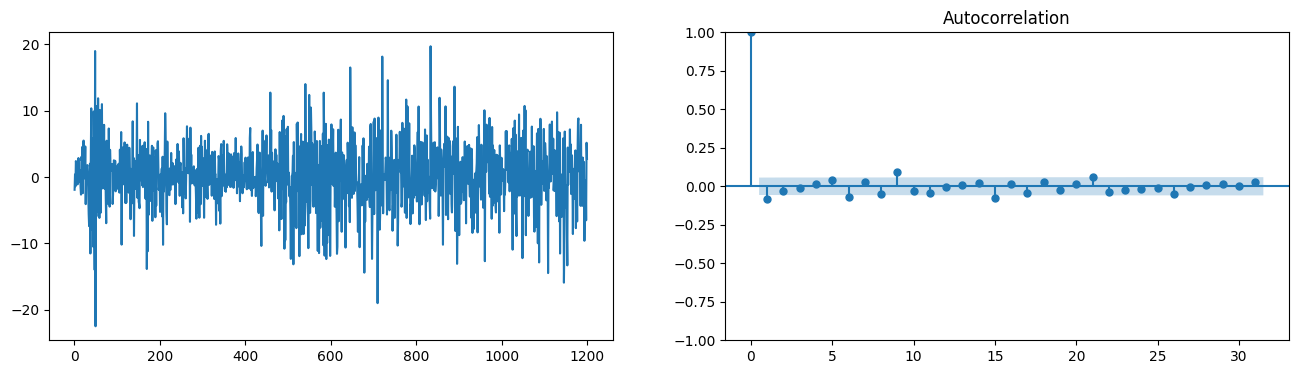

In [18]:
diff = df.MSFT.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))


ax1.plot(diff)


ax2.set_ylim(0, 1)

plot_acf(diff, ax=ax2);

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.MSFT, order=(6,1,4))
model_fit = model.fit()
print(model_fit.summary())

/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1201
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -3573.716
Date:                Mon, 18 Nov 2024   AIC                           7169.433
Time:                        17:03:43   BIC                           7225.424
Sample:                             0   HQIC                          7190.524
                               - 1201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1874      0.478     -0.392      0.695      -1.124       0.749
ar.L2         -0.3436      0.285     -1.206      0.228      -0.902       0.215
ar.L3         -0.6112      0.268     -2.283      0.0

/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([9.59888781e-03, 4.71390926e-02, 2.85115480e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.75192466e-05]),
 array([-21.28331917,  -3.76116706,  13.76098504,  31.28313715,
         48.80528926,  66.32744137,  83.84959347, 101.37174558,
        118.89389769, 136.4160498 , 153.9382019 ]),
 <BarContainer object of 10 artists>)

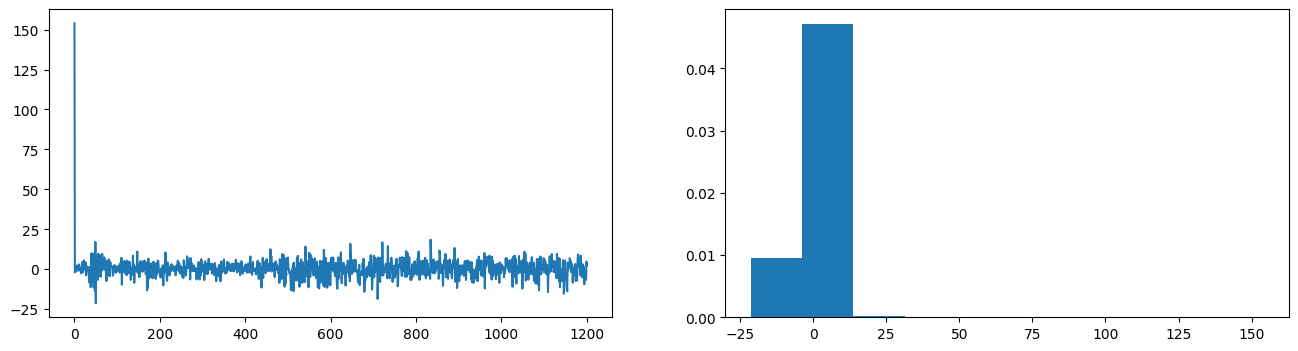

In [20]:
#plotting residual errors

residuals = pd.DataFrame(model_fit.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)

ax2.hist(residuals, density=True)


In [21]:
# model_fit.plot_predict(dynamic=False)
# plt.show()

In [22]:
train = pd.DataFrame(df['MSFT'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['MSFT'][int(len(df)*0.70): int(len(df))])

testshape = test.shape

print(train.shape)
print(test.shape)

(840, 1)
(361, 1)


In [24]:

model = ARIMA(train, order=(6, 1, 4))  
res = model.fit() 
#forecast shape
pred = res.forecast(steps=testshape[0])
conf = res.get_forecast(steps=testshape[0], alpha = 0.05)  # = 95% confidence
# #create confidence levels
confidence = conf.conf_int(alpha=0.05)

lower1 = pd.Series(confidence['lower MSFT'])
upper1 = pd.Series(confidence['upper MSFT'])

fc_series = pd.Series(data = pred.values, index=test.index)
lower_series = pd.Series(data = lower1.values, index=test.index, name = 'lower Series')
upper_series = pd.Series(data = upper1.values, index=test.index, name=None)

print(lower_series)



/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


840     290.811112
841     287.882974
842     283.862337
843     283.244597
844     281.302335
           ...    
1196    143.615963
1197    143.397213
1198    143.178767
1199    142.960626
1200    142.742787
Name: lower Series, Length: 361, dtype: float64


/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/void/allinfo_new/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


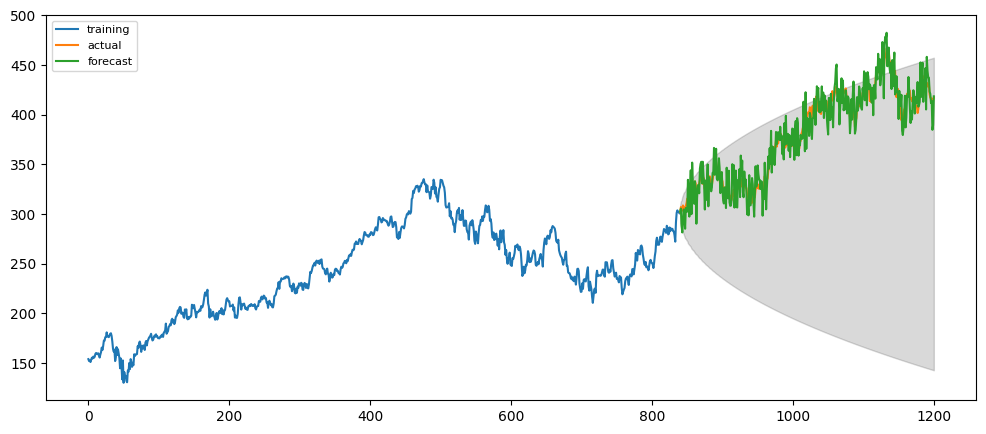

In [44]:
plt.figure(figsize=(12,5), dpi=100)

plt.plot(train, label='training')

plt.plot(test, label='actual')

plt.plot(fc_series, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)


plt.legend(loc='upper left', fontsize=8)
plt.show()

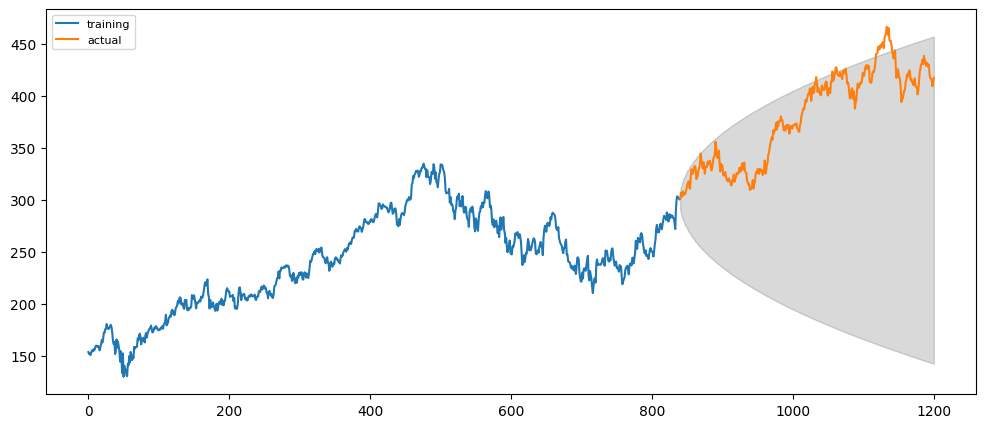

In [48]:
plt.figure(figsize=(12,5), dpi=100)

plt.plot(train, label='training')

plt.plot(test, label='actual')


plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)


plt.legend(loc='upper left', fontsize=8)
plt.show()

Predicting a specific value

In [ ]:
# pred = model_fit.plot_predict(1, 365)

In [37]:
test.mean()

MSFT    380.014385
dtype: float64

Finding the root mean square error

In [47]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt

mape(fc_series,test)


0.11200788562681119